In [1]:
%pip install duckdb pandas numpy pyspainmobility requests

Note: you may need to restart the kernel to use updated packages.


<h1 align="center"><b>Building a 3-Tier Data Lakehouse for Mobility Analysis in Spain</b></h1>
<h3 align="center"><b style="color:gray">Gold Layer</b></h3>
<h4 align="right">Joan Fernández Navarro & Borja Albert Gramaje</h4>
<h3><b>Table of Contents</b></h3>
<ul style = "list-style-type: none; line-height: 0.5em;">
    <li><a href="#q1"><h5>1. Business Question 1</h5></a></li>
    <li><a href="#q2"><h5>2. Business Question 2</h5></a></li>
</ul>

In [2]:
import os
import duckdb
import requests
import pandas as pd
from pyspainmobility import Mobility, Zones

BASE_PATH = f"{os.getcwd()}/../../raw"
LAKE_LAYER = "gold"

con = duckdb.connect("./../../mobility.db")

def SQL(q):
    """Run SQL (printed for clarity) and return a DataFrame."""
    return con.execute(q).fetchdf()

print("DuckDB version:", con.sql("SELECT version();").fetchone()[0])

DuckDB version: v1.4.2


<h2 id="q1"><b>1. Business Question 1: Typical Day in Mobility for a Reference Year</b></h2>

In [59]:
SQL("""
    SELECT *, CAST(viajes AS INTEGER) AS viajes_int
    FROM bronze_mitma_od_gau

    UNION ALL

    SELECT *, CAST(viajes AS INTEGER) AS viajes_int
    FROM bronze_mitma_od_municipios

    UNION ALL

    SELECT *, CAST(viajes AS INTEGER) AS viajes_int
    FROM bronze_mitma_od_distritos

    ORDER BY viajes_int DESC
    LIMIT 20
""")

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,residencia,renta,edad,sexo,viajes,viajes_km,estudio_destino_posible,estudio_origen_posible,loaded_at,source_file,viajes_int
0,20220303,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,>15,45-65,mujer,18996.93,90782.038,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,18997
1,20220303,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,10-15,45-65,mujer,18831.837,91311.245,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,18832
2,20220304,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,10-15,45-65,mujer,17562.185,84415.297,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,17562
3,20220304,14,GAU Madrid,GAU Madrid,0.5-2,frecuente,casa,28,10-15,45-65,mujer,17542.066,21311.297,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,17542
4,20220304,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,>15,45-65,mujer,17125.443,80962.213,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,17125
5,20220303,08,GAU Madrid,GAU Madrid,0.5-2,casa,frecuente,28,10-15,45-65,mujer,16717.248,20911.137,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,16717
6,20220303,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,>15,25-45,mujer,16692.804,79708.001,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,16693
7,20220303,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,10-15,25-45,mujer,16673.719,80961.202,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,16674
8,20220303,08,GAU Madrid,GAU Madrid,2-10,casa,frecuente,28,10-15,45-65,hombre,16513.202,79211.988,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,16513
9,20220303,14,GAU Madrid,GAU Madrid,0.5-2,frecuente,casa,28,10-15,45-65,mujer,16409.672,20103.389,no,no,2025-11-18 20:57:31.892768,/home/balbert/workspace/MUCEIM/bigdata/muceim-...,16410


In [60]:
SQL("""
    SELECT *,
    FROM silver_od_all
    ORDER BY viajes DESC
    LIMIT 20
""")

,zone_level,fecha,hora,origen_zone_id,destino_zone_id,viajes,viajes_km,distancia,actividad_origen,actividad_destino,residencia,renta,edad,sexo,estudio_destino_posible,estudio_origen_posible,is_weekend,is_holiday
0,distritos,2022-03-05,23,2608902,2608906,9.991648e+11,1.906021e+11,0.5-2,casa,no_frecuente,26,10-15,45-65,hombre,False,False,True,False
1,distritos,2022-03-05,23,2601801,2601802,9.983100e+11,1.370805e+11,0.5-2,frecuente,casa,26,10-15,25-45,NA,False,False,True,False
2,distritos,2022-03-03,1,3908701,3908701,9.973372e+11,8.143725e+11,0.5-2,frecuente,casa,39,10-15,65-100,NA,False,False,False,False
3,gau,2022-03-05,0,17006_AM,25051_AM,9.966326e+11,1.342928e+11,10-50,no_frecuente,casa,25,>15,NA,NA,False,False,True,False
4,distritos,2022-03-05,0,17006_AM,25051_AM,9.966326e+11,1.342928e+11,10-50,no_frecuente,casa,25,>15,NA,NA,False,False,True,False
5,municipios,2022-03-05,0,17006_AM,25051_AM,9.966326e+11,1.342928e+11,10-50,no_frecuente,casa,25,>15,NA,NA,False,False,True,False
6,gau,2022-03-05,23,GAU Logroño,GAU Logroño,9.964613e+11,3.406920e+11,2-10,casa,frecuente,26,10-15,NA,NA,False,False,True,False
7,municipios,2022-03-03,1,39075,39016,9.948812e+11,4.435484e+11,2-10,casa,frecuente,39,10-15,25-45,mujer,False,False,False,False
8,distritos,2022-03-03,1,3907508,3901601,9.948812e+11,4.435484e+11,2-10,casa,frecuente,39,10-15,25-45,mujer,False,False,False,False
9,distritos,2022-03-05,23,2608901,2608902,9.942648e+11,7.467503e+10,0.5-2,frecuente,casa,26,10-15,65-100,mujer,False,False,True,False


In [50]:
# SQL("""
#     --- query que cuenta por nivel, zona, fecha, hora y si es fin de semana o no el total de viajes
#     SELECT zone_level, fecha, hora, is_weekend, origen_zone_id, SUM(viajes) AS total_viajes, 
#     FROM silver_od_all
#     GROUP BY fecha, is_weekend, origen_zone_id, hora, zone_level
#     ORDER BY fecha, hora ASC
# """)

SQL("""
    SELECT 
        fecha, 
        hora, 
        is_weekend, 
        SUM(viajes) AS total_viajes
    FROM silver_od_all
    GROUP BY fecha, is_weekend, hora
    ORDER BY fecha, hora ASC
""")
    # .plot(x='hora', y='total_viajes', kind='line', title='Total viajes por hora')

,fecha,hora,is_weekend,total_viajes
0,2022-03-03,0,False,1.133662e+13
1,2022-03-03,1,False,1.176224e+15
2,2022-03-03,2,False,2.309950e+12
3,2022-03-03,3,False,8.120475e+12
4,2022-03-03,4,False,1.390229e+12
...,...,...,...,...
67,2022-03-05,19,True,1.933538e+10
68,2022-03-05,20,True,1.875325e+10
69,2022-03-05,21,True,1.632065e+10
70,2022-03-05,22,True,1.346593e+10


In [ ]:
SQL("""
    CREATE OR REPLACE TABLE gold_typical_day_patterns AS
    WITH daily_aggregates AS (
        SELECT
            zone_level,
            fecha,
            hora,
            is_weekend,
            is_holiday,
            SUM(viajes) AS total_viajes
        FROM silver_od_all
        GROUP BY zone_level, fecha, hora, is_weekend, is_holiday
    ),
    day_types AS (
        SELECT
            zone_level,
            hora,
            CASE
                WHEN is_holiday THEN 'festivo'
                WHEN is_weekend THEN 'fin_semana'
                ELSE 'laborable'
            END AS tipo_dia,
            AVG(total_viajes) AS avg_viajes_por_hora
        FROM daily_aggregates
        GROUP BY zone_level, hora, tipo_dia
    )
    SELECT * FROM day_types
    ORDER BY zone_level, hora, tipo_dia;
""")

In [3]:
SQL("""
    CREATE OR REPLACE TABLE gold_typical_day_patterns AS
    WITH daily_aggregates AS (
        SELECT
            zone_level,
            fecha,
            hora,
            is_weekend,
            is_holiday,
            SUM(viajes) AS total_viajes
        FROM silver_od_all
        GROUP BY zone_level, fecha, hora, is_weekend, is_holiday
    ),
    day_types AS (
        SELECT
            zone_level,
            hora,
            CASE
                WHEN is_holiday THEN 'festivo'
                WHEN is_weekend THEN 'fin_semana'
                ELSE 'laborable'
            END AS tipo_dia,
            AVG(total_viajes) AS avg_viajes_por_hora
        FROM daily_aggregates
        GROUP BY zone_level, hora, tipo_dia
    )
    SELECT * FROM day_types
    ORDER BY zone_level, hora, tipo_dia;
""")

,Count
0,144


In [4]:
SQL("""
WITH ranking_horas AS (
    SELECT
        hora,
        tipo_dia,
        zone_level,
        avg_viajes_por_hora,
        RANK() OVER (
            PARTITION BY tipo_dia, zone_level
            ORDER BY avg_viajes_por_hora DESC
        ) as ranking
    FROM gold_typical_day_patterns
)

SELECT * 
FROM ranking_horas
WHERE ranking <= 10
    AND zone_level = 'distritos'
ORDER BY tipo_dia, ranking;
""")

,hora,tipo_dia,zone_level,avg_viajes_por_hora,ranking
0,23,fin_semana,distritos,7.410661e+14,1
1,0,fin_semana,distritos,1.913907e+13,2
2,4,fin_semana,distritos,1.619487e+12,3
3,1,fin_semana,distritos,9.631233e+11,4
4,7,fin_semana,distritos,8.335990e+11,5
5,17,fin_semana,distritos,6.833978e+11,6
6,16,fin_semana,distritos,5.420209e+11,7
7,14,fin_semana,distritos,3.255801e+11,8
8,5,fin_semana,distritos,2.986556e+11,9
9,8,fin_semana,distritos,1.600167e+11,10


<Axes: title={'center': 'Promedio de viajes por horas'}, xlabel='hora'>

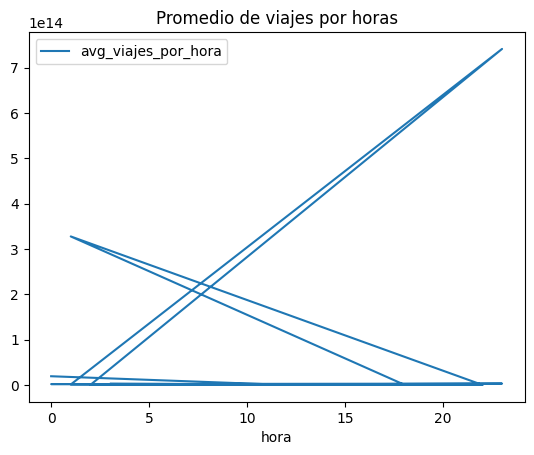

In [5]:
SQL("""
SELECT
    hora,
    tipo_dia,
    avg_viajes_por_hora,
FROM gold_typical_day_patterns
WHERE zone_level = 'distritos'
ORDER BY zone_level, tipo_dia;
""").plot(x = "hora", y = "avg_viajes_por_hora", title = "Promedio de viajes por horas")

<h2 id="q1"><b>1. Business Question 2: Where is Transport Infrastructure Most Lacking?</b></h2>